In [1]:
import requests #to get data from sites 
import numpy as np 
import pandas as pd 
import tweepy #twitter api
import json #handle json data
import matplotlib.pyplot as plt #visualization
import seaborn as sns #data visualization
import re #text 

# Gathering Process

### WeRateDogs Twitter archive

In [2]:
df_twit = pd.read_csv("twitter-archive-enhanced.csv")

df_twit.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Tweet image predictions

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

In [4]:
response = requests.get(url)
with open("image_predictions.tsv", mode = "wb") as file:# wb since binary form
    file.write(response.content)

In [5]:
df_pred = pd.read_csv('image_predictions.tsv',sep='\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter -API  since was having problem with twitter account had to go for this option

In [6]:
api_d=[]
with open("tweet-json.txt", "r") as file:
    for line in file:
        try: 
            tweet = json.loads(line)           
            api_d.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"]             
            })               
                
        except:
            print("Error.") 
df_apit = pd.DataFrame(api_d, columns = ["tweet_id", "retweet_count", "favorite_count"])
df_apit.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Data Assessing 

# Now looking at Archive data  df_twit

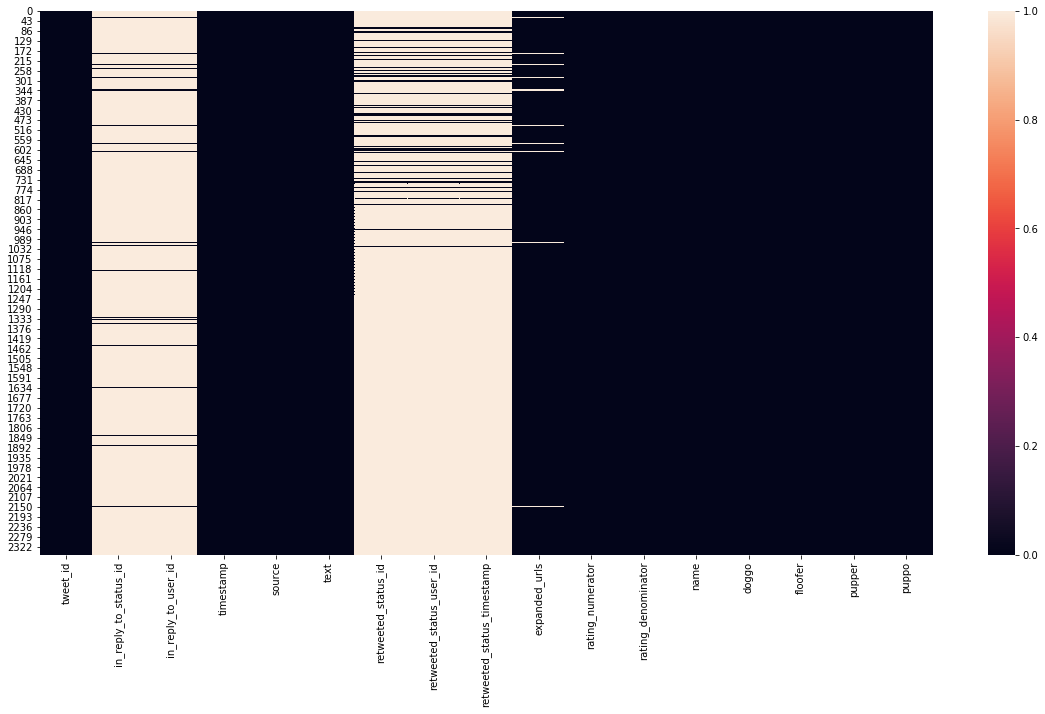

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_twit.isnull())

the above plot shows there are many missing values for some columns

In [8]:
df_twit.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None
1680,682003177596559360,NaN,NaN,2015-12-30 01:00:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,None,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None
515,811386762094317568,NaN,NaN,2016-12-21 01:44:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,None,None,pupper,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
1888,674781762103414784,NaN,NaN,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674781762...,8,10,None,None,None,None,None
416,822610361945911296,NaN,NaN,2017-01-21 01:02:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non-canines like this V...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822610361...,12,10,None,None,None,None,None


In [9]:
df_twit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

From the data it can be seen that tweet id should be string form but it is in int format. Furthermore timestamp should be in datetime format but it is not.

In [10]:
df_twit.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


From the above table it can be seen that the rating_numerator has a very high max value of 1776 while denominator has a low max value of 170

In [11]:
df_twit.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_twit[df_twit['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


so tweeter ids do not have duplicates

In [13]:
df_twit[df_twit['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [14]:
df_twit['name'].value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
the              8
Sadie            8
Toby             7
Daisy            7
an               7
Bailey           7
Buddy            7
Koda             6
Jax              6
Scout            6
Oscar            6
Jack             6
Stanley          6
Bella            6
Dave             6
Rusty            6
Leo              6
Milo             6
Finn             5
              ... 
Jay              1
Jerome           1
infuriating      1
Jonah            1
Kenzie           1
Edgar            1
Geno             1
Zooey            1
Philippe         1
Buckley          1
Lizzie           1
Rodney           1
Ben              1
Norman           1
Kirk             1
Flash            1
Marlee           1
Sephie           1
Eriq             1
Gilbert          1
Snoopy           1
Lugan       

Thus the name column has many NAN values and repetitive useless words like the/a/an

Next need to check the number of instances where the size of the dog was not captured properly

Now creating a copy of df_twit to further assess the data frame

In [15]:
df_twit_as=df_twit.copy()

In [16]:
df_twit_as['Check']=df_twit_as[["doggo","floofer","pupper","puppo"]].apply(lambda x: True if (x[0]=="None" and x[1]=="None" and x[2]=="None")else False,axis=1)
df_twit_as['Check'].value_counts()

True     2005
False     351
Name: Check, dtype: int64

In [17]:
df_twit_as['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

Comparing the two cells above it can be seen that there are many rows where proper stage of the dog is not mentioned

Now looking at the ratings 

In [18]:
df_twit['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df_twit['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

So in most of the cases it can be seen the denominator is 10 

In [20]:
df_twit[df_twit['rating_numerator']==1776]['text']

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [21]:
df_twit[df_twit['rating_numerator']==960]['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [22]:
df_twit[df_twit['rating_numerator']==0]['text']

315     When you're so blinded by your systematic plag...
1016    PUPDATE: can't see any. Even if I could, I cou...
Name: text, dtype: object

In [23]:
df_twit[df_twit['rating_numerator']==1]['text']

605     RT @dog_rates: Not familiar with this breed. N...
1446    After reading the comments I may have overesti...
1869    What kind of person sends in a picture without...
1940    The millennials have spoken and we've decided ...
2038    After 22 minutes of careful deliberation this ...
2091    Flamboyant pup here. Probably poisonous. Won't...
2261    Never seen dog like this. Breathes heavy. Tilt...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2338    Not familiar with this breed. No tail (weird)....
Name: text, dtype: object

From the above scores it can be seen lower numerator score that something is unusal about the dog.

In [24]:
df_twit[df_twit['rating_denominator']==170]['text']

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

In [25]:
df_twit[df_twit['rating_denominator']==0]['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

### Frrom the above analysis of numerator and denominator ratings it is clear that there is some problem with them. A possible reason could be when the ratings where typecasted to a particular data type (int in this case) there might have been a loss of data

"(\d+(\.\d+)?\/\d+(\.\d+)?)" would be used to extract from the rating from the text 

In [26]:
pat="(\d+(\.\d+)?\/\d+(\.\d+)?)"
df_twit_as["rating"] = df_twit_as.text.str.extract(pat, expand = True)[0]

In [27]:
# getting numerator and denominator out of the rating column
df_twit_as[['num', 'denom']] = df_twit_as['rating'].str.split('/', n=1, expand=True)

In [28]:
##Now changing the columns for denominator and numerator into string
df_twit_as.rating_numerator = df_twit_as.rating_numerator.astype("str")
df_twit_as.rating_denominator = df_twit_as.rating_denominator.astype("str")

In [29]:
df_twit_as["check_num"] = df_twit_as[["rating_numerator", "num"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)
df_twit_as["check_num"].value_counts()

True     2349
False       7
Name: check_num, dtype: int64

In [30]:
df_twit_as.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null object
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
Check                         

In [31]:
df_twit_as[df_twit_as['check_num']==False][['rating_numerator','num','check_num']]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


So these are the cases where the rating_numerator and extracted numerator does not match

Doing the same thing for denominator

In [32]:
df_twit_as["check_denom"] = df_twit_as[["rating_denominator", "denom"]].apply(lambda x: False if (x[0] != x[1]) else True, axis = 1)
df_twit_as["check_denom"].value_counts()

True     2355
False       1
Name: check_denom, dtype: int64

In [33]:
df_twit_as[df_twit_as['check_denom']==False][['rating_denominator','denom','check_denom']]

,rating_denominator,denom,check_denom
313,0,00,False


Only place where there is a problem and this is not a major issue 

Now need to check the number of times similar rating patterns occur in one tweet

In [34]:
df_twit_as["rat_pat_count"] = df_twit_as.text.str.count(pat)

In [35]:
df_twit_as["rat_pat_count"].value_counts()

1    2323
2      32
3       1
Name: rat_pat_count, dtype: int64

So in 32 cases similar pattern occur 2 times and in 1 case it occurs 3 times

In [36]:
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_colwidth',5000)

df_twit_as[["text", "rat_pat_count"]].query("rat_pat_count != 1")

,text,rat_pat_count
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,2


In [37]:
df_twit_as.query("rat_pat_count != 1")['retweeted_status_id'].value_counts()

7.403732e+17    1
7.776842e+17    1
6.732953e+17    1
Name: retweeted_status_id, dtype: int64

so some of the tweets with multiple rating patterns were retweeted as well

# Now looking at prediction data df_pred

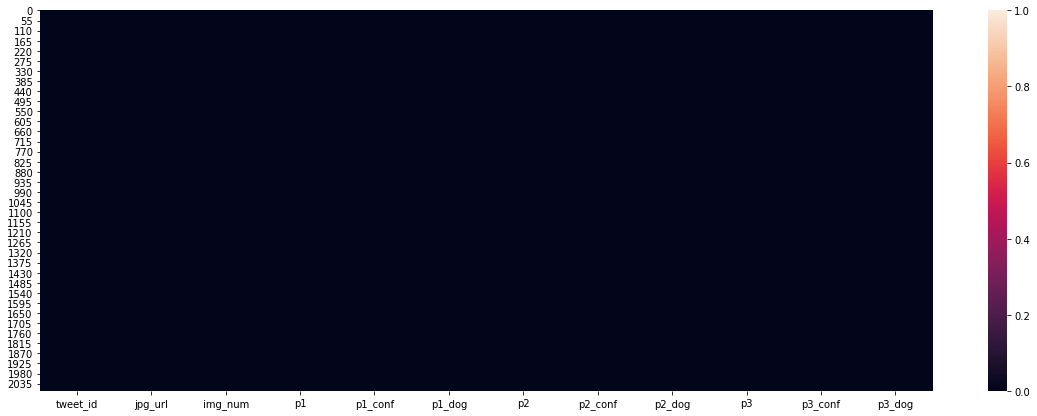

In [38]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_pred.isnull(), vmin = 0, vmax = 1)

Thus there are no missing values

In [39]:
df_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
153,668655139528511488,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.319110,True,Italian_greyhound,0.103338,True,basenji,0.091930,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True
263,670792680469889025,https://pbs.twimg.com/media/CU8iYi2WsAEaqQ0.jpg,1,brown_bear,0.882426,False,toy_poodle,0.031355,True,miniature_poodle,0.025743,True
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,sliding_door,0.344526,False,doormat,0.190027,False,washbasin,0.046326,False
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
1267,749403093750648834,https://pbs.twimg.com/media/CmZqIslWIAQFiqe.jpg,1,Chesapeake_Bay_retriever,0.694541,True,curly-coated_retriever,0.076335,True,Irish_water_spaniel,0.048550,True
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False


Issues noted:
Species nomenclature not uniform- some are in upper case some in lower case along with _ in some places insted of space
Some rows have False in all the dog prediction columns

In [40]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


the tweet_id column should be in string format rather than integer format

In [41]:
df_pred['jpg_url'].value_counts()

https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                       

This shows several of the tweets are either duplicates or retweets

In [42]:
df_pred[df_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


thus the tweets are retweets and not duplicate tweets

Now we need to look at cases where no prediction of dog was done in any of the first second and third tries

In [43]:
df_pred.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [44]:
df_pred.query("p1_dog == False and (p2_dog == True or p3_dog == True)")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,0.278407,True,groenendael,0.102643,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,0.167175,True,Chihuahua,0.086951,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
87,667524857454854144,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,hare,0.447893,False,dhole,0.092435,False,Chesapeake_Bay_retriever,0.088122,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
108,667878741721415682,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False


Thus there might be cases where dogs where predicted later due to being in the background

# Now looking at API data  df_apit

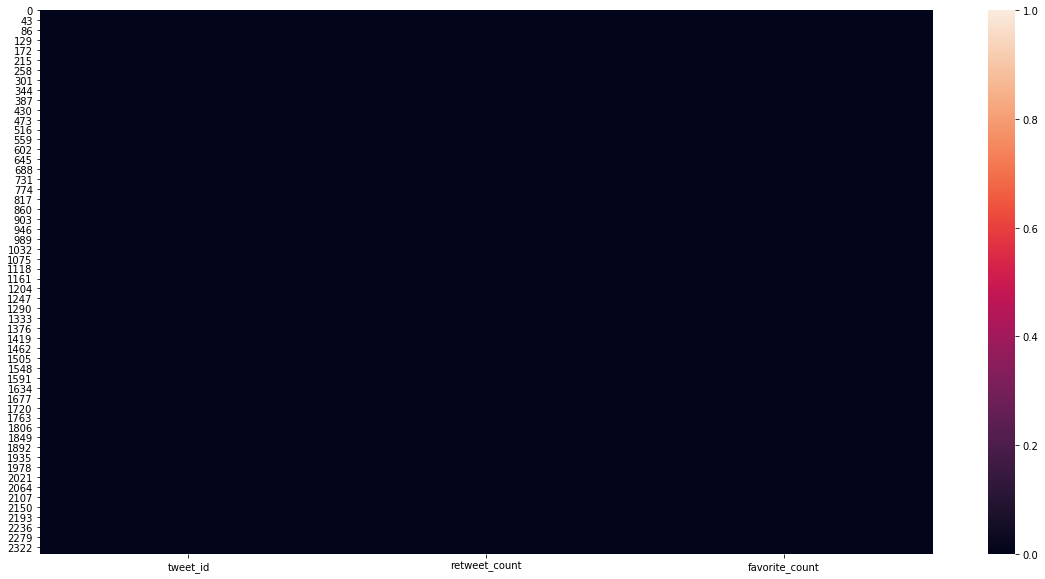

In [45]:
fig, ax = plt.subplots(figsize = (20,10))
ax = sns.heatmap(df_apit.isnull(), vmin = 0, vmax = 1)

No missing Values

In [46]:
df_apit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


The tweet_id column should be in string format

## Summary of Assessing :

## Quality of df_twit:

the datatype of id column is not in right format it should be in string but it is in int format  
the timestamp column should be in date-time format but it is in string(object) format  
the name column have quite a few repetation and some of the entries 'the','a','an' does not make much sense   
The stages of some of the dogs are not clear and they are classied as none under all section of stages( doggo,...)  
there are number of retweets  
the conversion of rating to integer is not correct at several places (float and integer problem)  
Also the extracting of rating from text column is also not right at many places

## Tidiness of df_twit:

the columns sigifying stages of dogs (doggo,floofer...) should be in one column

## Quality of df_pred:

the id column has data-type integer which should be string instead  
there are number of retweets(tweets having same jpg url)  
many of the tweets do not have proper prediction of dogs in any of the three predictions  
the species prediction are not in the right format- at some places there are _ instead of space at same places there are no case uniformity

## Tidiness of df_twit:

the prediction and confidence columns should be reduced for better interpretability

## Quality of df_apit:

the tweet_id column should be in the right format

## Tidiness of df_apit:

the df_apit is sufficiently tidy 

# Cleaning 

Cleaning steps to be undertaken:  
1)Merge all the tables into a master table  
2)Remove the retweets and replies   
3)Remove the tweets with no picture and no images of dogs  
4)Rectify the datatypes of the columns  
5)Remove the wrong numerators - Replace the float ones with integers and drop the ones with multiple pattern occurences  
6)extract the source from the html code  
7)remove the none from the doggo,flooper,pupper and puppo columns and merge them in one column  
8)Clean the names column  
9)Modify the prediction and confidence column into two columns dog_breed and confidence  
10)Clean the dog_breed column by removing '_' and converting everything into lower case

#### Define

Merge all the tables into a master table

#### Code

In [47]:
df_master = pd.merge(df_twit, df_apit, on = "tweet_id", how = "outer")

In [48]:
df_master=pd.merge(df_master, df_pred, on = "tweet_id", how = "outer")

In [49]:
df_master_c=df_master.copy()

#### Test

In [50]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 23

#### Define

Remove the retweets and replies

#### Code

In [51]:
df_master_c[df_master_c.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


thus no duplicates are there

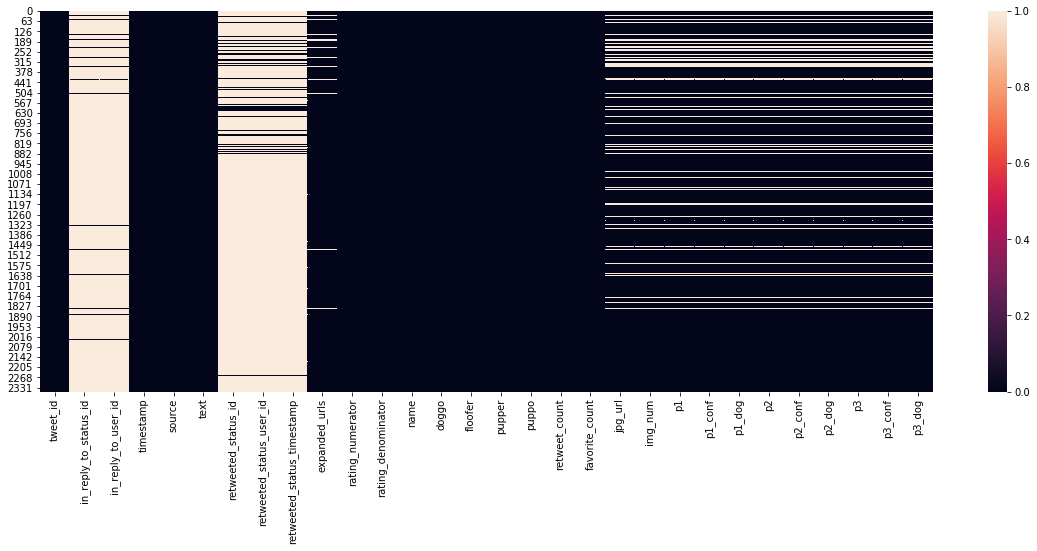

In [52]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

Only the tweets with no retweets are our interest

In [53]:
df_master_c = df_master_c[df_master_c["retweeted_status_id"].isnull()]

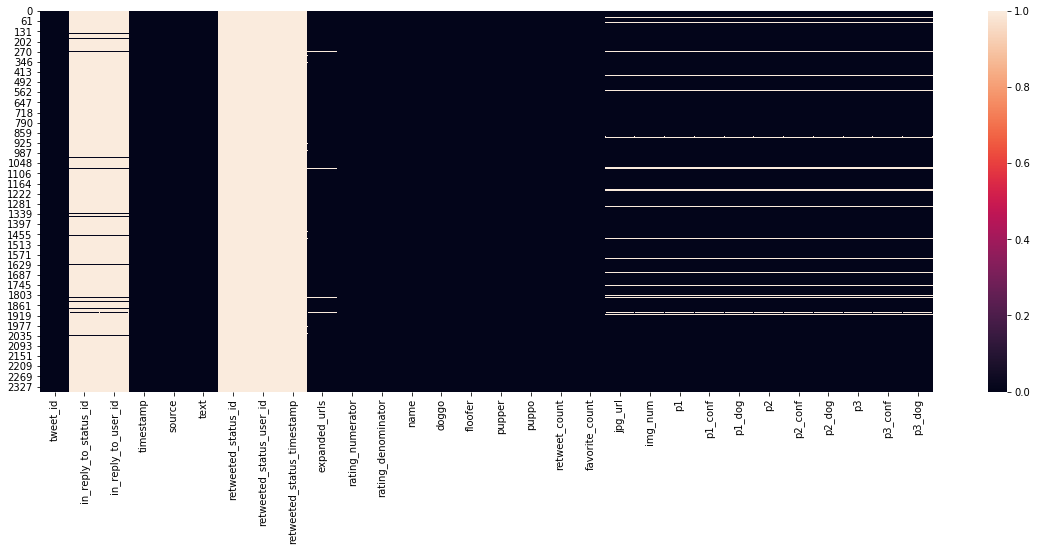

In [54]:
ig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

Similarly Only the tweets which are not replies are our interest

In [55]:
df_master_c = df_master_c[df_master_c.in_reply_to_status_id.isnull()]

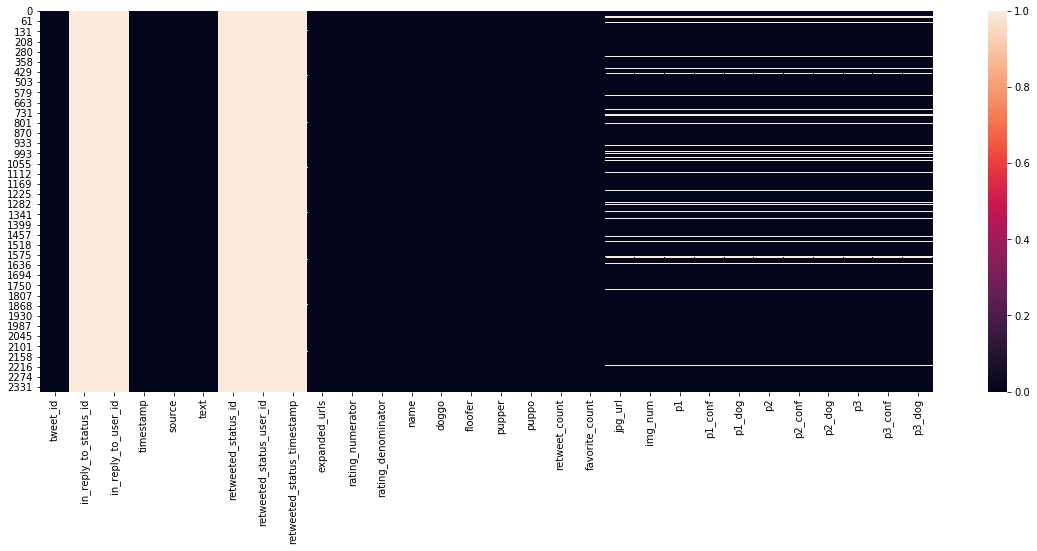

In [56]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

In [57]:
#now droppin the unneeded columns
df_master_c.drop(["in_reply_to_status_id", "in_reply_to_user_id",
                      "retweeted_status_id", "retweeted_status_user_id", 
                      "retweeted_status_timestamp"], inplace=True, axis = 1)

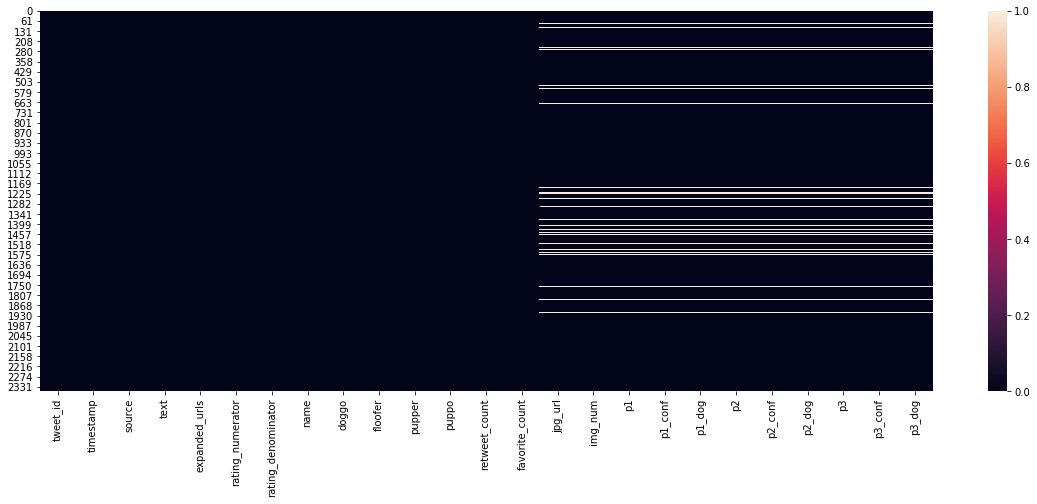

In [58]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

#### Test

In [59]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
retweet_count         2097 non-null float64
favorite_count        2097 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-n

#### Define

Remove the tweets with no picture and those with images that do not have dogs

#### Code

In [60]:
# dropping tweets with no image
df_master_c.dropna(subset = ["jpg_url"], inplace = True)

In [61]:
sum(df_master_c.jpg_url.duplicated())

0

Hence no duplicates 

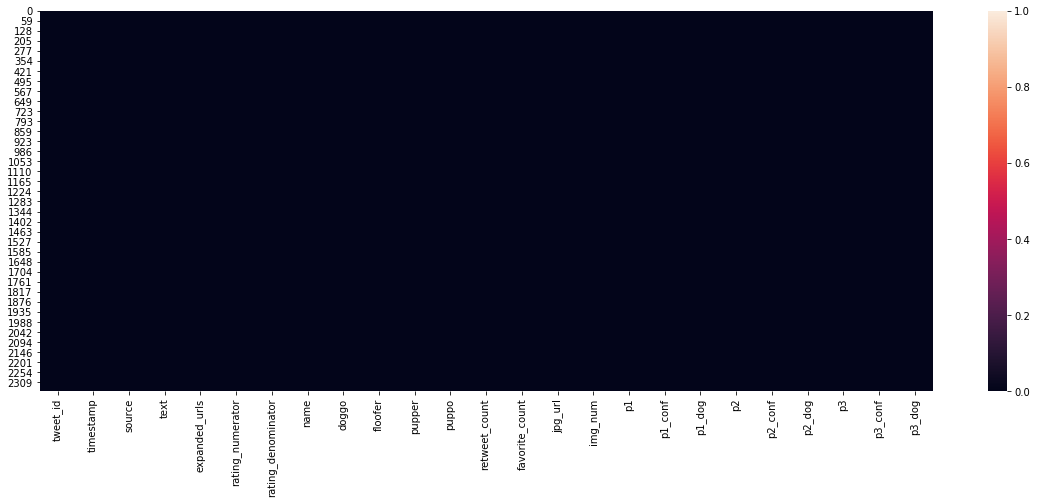

In [62]:

fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

NoW removing the entries which do not have dog predictions in any of the three predictions

In [63]:
df_master_c.drop(df_master_c.query("p1_dog == False and p2_dog == False and p3_dog == False").index, inplace = True)

In [64]:
df_master_c.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Hence all such rows are removed.

#### Test

In [65]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1666 non-null int64
timestamp             1666 non-null object
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null float64
favorite_count        1666 non-null float64
jpg_url               1666 non-null object
img_num               1666 non-null float64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 non-n

#### Define

Rectify the datatypes of the columns  

#### Code

In [66]:
df_master_c["tweet_id"] = df_master_c["tweet_id"].astype("str")
df_master_c["timestamp"] = pd.to_datetime(df_master_c.timestamp)
df_master_c['retweet_count'] = df_master_c['retweet_count'].astype("int64")
df_master_c['favorite_count'] = df_master_c['favorite_count'].astype("int64")
df_master_c['img_num'] = df_master_c['img_num'].astype("int64")

#### Test

In [67]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1666 non-null object
timestamp             1666 non-null datetime64[ns]
source                1666 non-null object
text                  1666 non-null object
expanded_urls         1666 non-null object
rating_numerator      1666 non-null int64
rating_denominator    1666 non-null int64
name                  1666 non-null object
doggo                 1666 non-null object
floofer               1666 non-null object
pupper                1666 non-null object
puppo                 1666 non-null object
retweet_count         1666 non-null int64
favorite_count        1666 non-null int64
jpg_url               1666 non-null object
img_num               1666 non-null int64
p1                    1666 non-null object
p1_conf               1666 non-null float64
p1_dog                1666 non-null object
p2                    1666 non-null object
p2_conf               1666 no

#### Define

Remove the wrong numerators - Replace the float ones with integers and drop the ones with multiple pattern occurences 

#### Code

In [68]:
#Since till now many rows have been removed there is a need to again extract the ratings
df_twit_as[df_twit_as['check_num']==False][['rating_numerator','num','check_num']]

,rating_numerator,num,check_num
45,5,13.5,False
340,75,9.75,False
387,7,007,False
695,75,9.75,False
763,27,11.27,False
1689,5,9.5,False
1712,26,11.26,False


In [69]:
pattern = "(\d+\.\d+\/\d+)"

df_master_c.text.str.extract(pattern, expand = True)[0].dropna()#checking after the rows have been cleaned

45       13.5/10
695      9.75/10
763     11.27/10
1712    11.26/10
Name: 0, dtype: object

In [70]:
df_num_c = df_master_c.text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]
df_num_c

45       13.5
695      9.75
763     11.27
1712    11.26
Name: 0, dtype: object

In [71]:
df_num_cindex = df_num_c.index
df_num_cvalues = df_num_c.values.astype("float64")

Now replacing the values in the clean master data

In [72]:
df_master_c.rating_numerator = df_master_c.rating_numerator.astype("float64")
df_master_c.rating_denominator = df_master_c.rating_denominator.astype("float64")
#impute the data
df_master_c.loc[df_num_cindex, "rating_numerator"] = df_num_cvalues
df_master_c.loc[df_num_cindex].rating_numerator

45      13.50
695      9.75
763     11.27
1712    11.26
Name: rating_numerator, dtype: float64

Also the cases where there are repetition of rating patterns in tweets have to be removed

In [73]:
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)"

print(df_master_c.text.str.count(pattern)[df_master_c.text.str.count(pattern) != 1])

766     2
1007    2
1068    2
1165    2
1202    2
1222    2
1359    2
1465    2
1508    2
1525    2
1538    2
1662    2
1795    2
1832    2
1897    2
1901    2
1970    2
2010    3
2064    2
2113    2
2177    2
2216    2
2263    2
2272    2
2306    2
2335    2
Name: text, dtype: int64


In [74]:
pattern_cindex = df_master_c.text.str.count(pattern)[df_master_c.text.str.count(pattern) != 1].index

In [75]:
df_master_c.drop(pattern_cindex, inplace = True)

#### Test

In [76]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 25 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               164

In [77]:
## Again checking if there are any texts where the patterns are getiing repeated?
print(df_master_c.text.str.count(pattern)[df_master_c.text.str.count(pattern) != 1])

Series([], Name: text, dtype: int64)


So all the repetitions have been removed

#### Define

extract the source from the html code 

#### Code

In [78]:
df_master_c.source = df_master_c.source.str.extract("\>(.*?)\<", expand = True)#since the useful information is between <>

In [79]:
df_master_c.iloc[:,0:3].head(5)

,tweet_id,timestamp,source
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone


Thus now the source is properly extracted

#### Test

In [80]:
df_master_c.source.value_counts()

Twitter for iPhone    1611
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64

#### Define

remove the none from the doggo,flooper,pupper and puppo columns and merge them in one column 

#### Code

In [81]:
#Using " " to replace none values
for i in ["doggo", "floofer", "pupper", "puppo"]:
    df_master_c[i].replace("None", "", inplace = True)

## Since all of them are string type 
df_master_c['dog_cl'] = df_master_c['doggo']+ df_master_c['floofer'] + df_master_c['pupper']+ df_master_c['puppo']
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               164

In [82]:
df_master_c.dog_cl.value_counts()

                1385
pupper           164
doggo             54
puppo             21
floofer            7
doggopupper        7
doggofloofer       1
doggopuppo         1
Name: dog_cl, dtype: int64

In [83]:
## In order to remve the blanks
df_master_c["dog_cl"].replace("", np.nan, inplace = True)
df_master_c['dog_cl'].value_counts()
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 26 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
doggo                 1640 non-null object
floofer               1640 non-null object
pupper                1640 non-null object
puppo                 1640 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               164

In [84]:
## Now need to take care of cases where more than one classification is done
df_master_c.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)')[
    df_master_c.text.str.count(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)') > 1]

191     2
531     3
575     2
889     2
956     2
1063    2
1113    2
1304    2
1340    2
1367    2
1653    2
1788    2
1828    2
1907    3
Name: text, dtype: int64

In [85]:
df_master_c["dog_class_re"] = df_master_c.text.str.extract(r'(\bpuppo\b|\bdoggo\b|\bfloofer\b|\bpupper\b)', expand = True)

In [86]:
pd.set_option('display.max_colwidth', -1)
df_master_c["dog_class_re"]

1       NaN   
2       NaN   
3       NaN   
4       NaN   
5       NaN   
6       NaN   
7       NaN   
8       NaN   
9       doggo 
10      NaN   
11      NaN   
12      puppo 
13      NaN   
14      puppo 
15      NaN   
16      NaN   
17      NaN   
18      NaN   
20      NaN   
21      NaN   
23      NaN   
24      NaN   
25      NaN   
26      NaN   
27      NaN   
29      pupper
31      NaN   
33      NaN   
34      NaN   
37      NaN   
       ...    
2319    NaN   
2320    NaN   
2321    NaN   
2322    NaN   
2323    NaN   
2324    NaN   
2325    NaN   
2327    NaN   
2328    NaN   
2329    NaN   
2331    NaN   
2332    NaN   
2333    NaN   
2336    NaN   
2339    NaN   
2340    NaN   
2341    NaN   
2342    NaN   
2343    NaN   
2344    NaN   
2345    NaN   
2346    NaN   
2347    NaN   
2348    NaN   
2350    NaN   
2351    NaN   
2352    NaN   
2353    NaN   
2354    NaN   
2355    NaN   
Name: dog_class_re, Length: 1640, dtype: object

In [87]:
# Now comparing "dog_class_re" column with "dog_cl" column
pd.set_option('display.max_colwidth', -1)

# Dropping NA values from the subset where dog_cl and dog_class_re are not same
df_master_c[["text","dog_cl", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_cl != dog_class_re")

,text,dog_cl,dog_class_re
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo,puppo
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggopupper,doggo


The above table gives the cases where the dog_cl values should be replaced by dog_class_re values

Conducting the replacement for the above values
Comparing the text and replacing the values in dog_cl column. If there are two species mentioned then Nan is used.

In [88]:
df_master_c.loc[191, "dog_cl"] = "puppo"
df_master_c.loc[200, "dog_cl"] = "floofer"
df_master_c.loc[531, "dog_cl"] = np.nan
df_master_c.loc[575, "dog_cl"] = "pupper"
df_master_c.loc[889, "dog_cl"] = np.nan
df_master_c.loc[956, "dog_cl"] = np.nan
df_master_c.loc[1063, "dog_cl"] = np.nan
df_master_c.loc[1113, "dog_cl"] = np.nan

In [89]:
df_master_c[["text","dog_cl", "dog_class_re"]].dropna(subset = ["dog_class_re"]).query("dog_cl != dog_class_re")

,text,dog_cl,dog_class_re
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",floofer,doggo
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,pupper
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,pupper,doggo
889,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,doggo
956,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,NaN,doggo
1063,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,NaN,pupper
1113,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",NaN,doggo


In [90]:
# Now removing the unwanted columns
df_master_c.drop(["doggo", "floofer", "pupper", "puppo", "dog_class_re"], inplace = True, axis = 1)

#### Test

In [91]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 1 to 2355
Data columns (total 22 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1640 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
p1                    1640 non-null object
p1_conf               1640 non-null float64
p1_dog                1640 non-null object
p2                    1640 non-null object
p2_conf               1640 non-null float64
p2_dog                1640 non-null object
p3                    1640 non-null object
p3_conf               1640 non-null float64
p3_dog                1

#### Define

Clean the names column

#### Code

In [92]:
df_master_c.name.value_counts()

None           390
a              46 
Charlie        10 
Lucy           10 
Cooper         10 
Tucker         9  
Oliver         9  
Penny          8  
Winston        7  
Sadie          7  
the            7  
Daisy          7  
Toby           6  
Jax            6  
Koda           6  
Lola           6  
Bo             5  
Leo            5  
Bella          5  
Rusty          5  
Stanley        5  
Oscar          5  
Gus            4  
Duke           4  
Winnie         4  
Scout          4  
Maggie         4  
Bailey         4  
Bear           4  
Finn           4  
              ..  
Jerome         1  
infuriating    1  
Fred           1  
Jonah          1  
Kenzie         1  
Klein          1  
Baron          1  
Rolf           1  
Jackson        1  
Scruffers      1  
Lugan          1  
Rodney         1  
Ben            1  
Kirk           1  
Flash          1  
Jessiga        1  
Sephie         1  
Philippe       1  
Gidget         1  
Kingsley       1  
Wafer          1  
Edmund      

In [93]:
# Removing the words that were not needed

for x in ["None", "a", "by", "the"]:
    df_master_c["name"].replace(x, np.nan, inplace = True)

#### Test

In [94]:
df_master_c.name.value_counts()

Cooper         10
Lucy           10
Charlie        10
Oliver         9 
Tucker         9 
Penny          8 
Winston        7 
Sadie          7 
Daisy          7 
Jax            6 
Lola           6 
Toby           6 
Koda           6 
Stanley        5 
Oscar          5 
Bella          5 
Bo             5 
Rusty          5 
Leo            5 
Winnie         4 
Bentley        4 
George         4 
Reggie         4 
Dexter         4 
Bailey         4 
Sophie         4 
Dave           4 
Jack           4 
Chester        4 
Brody          4 
              .. 
Jay            1 
Jerome         1 
infuriating    1 
Fred           1 
Jonah          1 
Kenzie         1 
Klein          1 
Jackson        1 
Scruffers      1 
Wafer          1 
Gidget         1 
Maya           1 
Rodney         1 
Ben            1 
Kirk           1 
Flash          1 
Jessiga        1 
Sephie         1 
Philippe       1 
Lugan          1 
Acro           1 
Kingsley       1 
Edmund         1 
Bruno          1 
Emanuel   

#### Define

Modify the prediction and confidence column into two columns dog_breed and confidence

#### Code

In [113]:
#### Here the goal is to combine the breed prediction and confidence into 2 columns.So in order to that we have to check whether tha columns are set in the order of confidence

In [95]:
df_master_c.query("p2_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_cl


In [96]:
df_master_c.query("p3_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_cl


In [97]:
df_master_c.query("p3_conf > p2_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_cl


Hence it can be inferred that the confidence columns are in order 

In [98]:
def get_attr(c):
        if c[0] == True:
            return c[1]
        elif c[2] == True:
            return c[3]
        else:
            return c[4]
    
df_master_c["dog_breed"] = df_master_c[["p1_dog", "p1", "p2_dog", "p2","p3_dog", "p3"]].apply(get_attr, axis = 1)
df_master_c["confidence"] = df_master_c[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_dog", "p3_conf"]].apply(get_attr, axis = 1)

In [99]:
df_master_c[["p1","p1_dog", "p1_conf","p2", "p2_dog", "p2_conf","p3" ,"p3_dog","p3_conf","dog_breed","confidence"]]

,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf,dog_breed,confidence
1,Chihuahua,True,0.323581,Pekinese,True,0.090647,papillon,True,0.068957,Chihuahua,0.323581
2,Chihuahua,True,0.716012,malamute,True,0.078253,kelpie,True,0.031379,Chihuahua,0.716012
3,paper_towel,False,0.170278,Labrador_retriever,True,0.168086,spatula,False,0.040836,Labrador_retriever,0.168086
4,basset,True,0.555712,English_springer,True,0.225770,German_short-haired_pointer,True,0.175219,basset,0.555712
5,Chesapeake_Bay_retriever,True,0.425595,Irish_terrier,True,0.116317,Indian_elephant,False,0.076902,Chesapeake_Bay_retriever,0.425595
6,Appenzeller,True,0.341703,Border_collie,True,0.199287,ice_lolly,False,0.193548,Appenzeller,0.341703
7,Pomeranian,True,0.566142,Eskimo_dog,True,0.178406,Pembroke,True,0.076507,Pomeranian,0.566142
8,Irish_terrier,True,0.487574,Irish_setter,True,0.193054,Chesapeake_Bay_retriever,True,0.118184,Irish_terrier,0.487574
9,Pembroke,True,0.511319,Cardigan,True,0.451038,Chihuahua,True,0.029248,Pembroke,0.511319
10,Samoyed,True,0.957979,Pomeranian,True,0.013884,chow,True,0.008167,Samoyed,0.957979


In [100]:
# Now dropping the unnecessary columns
df_master_c.drop(df_master_c[["p1","p1_dog", "p1_conf","p2", "p2_dog", "p2_conf","p3" ,"p3_dog","p3_conf"]], inplace = True, axis = 1)

#### Test

In [114]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_cl                250 non-null object
dog_breed             1580 non-null object
confidence            1640 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 192.3+ KB


In [101]:
df_master_c.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_cl,dog_breed,confidence
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,NaN,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN,Chesapeake_Bay_retriever,0.425595


#### Define

Clean the dog_breed column by removing '_' and converting everything into lower case

#### Code

In [102]:
df_master_c.dog_breed = df_master_c.dog_breed.str.replace("_", " ")
df_master_c.dog_breed = df_master_c.dog_breed.str.lower()


In [103]:
## Matching indexes
df_master_c.reset_index(drop = True, inplace = True)

In [104]:
df_master_c.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,img_num,dog_cl,dog_breed,confidence
1543,668274247790391296,2015-11-22 03:46:11,Twitter for iPhone,Meet Sophie. Her son just got in the car to leave for college. Very touching. Perfect dramatic sunlight. 10/10 yaass https://t.co/3j9kZRcpVB,https://twitter.com/dog_rates/status/668274247790391296/photo/1,10.0,10.0,Sophie,248,886,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,NaN,soft-coated wheaten terrier,0.406374
289,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,NaN,3716,13518,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,NaN,west highland white terrier,0.872064
232,831262627380748289,2017-02-13 22:03:49,Twitter for iPhone,This is Tucker. He's feeling h*ckin festive and his owners don't have the heart to tell him Christmas is over. 12/10 https://t.co/zqR5XKMpuY,https://twitter.com/dog_rates/status/831262627380748289/photo/1,12.0,10.0,Tucker,2350,13066,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,NaN,cocker spaniel,0.263323
1199,679462823135686656,2015-12-23 00:45:35,Twitter for iPhone,Meet Hurley. He's the curly one. He hugs every other dog he sees during his walk. 11/10 for spreading the love https://t.co/M6vqkt2GKV,https://twitter.com/dog_rates/status/679462823135686656/photo/1,11.0,10.0,Hurley,21324,34856,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,NaN,toy poodle,0.62178
617,752660715232722944,2016-07-12 00:27:52,Twitter for iPhone,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,"https://twitter.com/dog_rates/status/752660715232722944/photo/1,https://twitter.com/dog_rates/status/752660715232722944/photo/1",10.0,10.0,NaN,1794,4878,https://pbs.twimg.com/media/CnH87L6XYAAF7I_.jpg,2,doggo,english setter,0.0505118
1126,684097758874210310,2016-01-04 19:43:10,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C,https://twitter.com/dog_rates/status/684097758874210310/photo/1,10.0,10.0,Lupe,1621,4515,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,NaN,labrador retriever,0.627856
1035,691675652215414786,2016-01-25 17:35:00,Twitter for iPhone,This is Richie and Plip. They are the best of pals. Do everything together. 10/10 for both https://t.co/KMdwNgONkV,https://twitter.com/dog_rates/status/691675652215414786/photo/1,10.0,10.0,Richie,577,2116,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,NaN,chihuahua,0.182898
952,700151421916807169,2016-02-18 02:54:41,Twitter for iPhone,If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n,https://twitter.com/dog_rates/status/700151421916807169/photo/1,11.0,10.0,NaN,754,2450,https://pbs.twimg.com/media/CbdwATgWwAABGID.jpg,1,pupper,italian greyhound,0.176838
1487,669926384437997569,2015-11-26 17:11:11,Twitter for iPhone,I've never seen a dog so genuinely happy about a tennis ball. 12/10 s'cute https://t.co/9RYY2NtHDw,https://twitter.com/dog_rates/status/669926384437997569/photo/1,12.0,10.0,NaN,115,400,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,NaN,pomeranian,0.984231
1285,675534494439489536,2015-12-12 04:35:48,Twitter for iPhone,Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,https://twitter.com/dog_rates/status/675534494439489536/photo/1,11.0,10.0,NaN,470,1953,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1,NaN,chow,0.749368


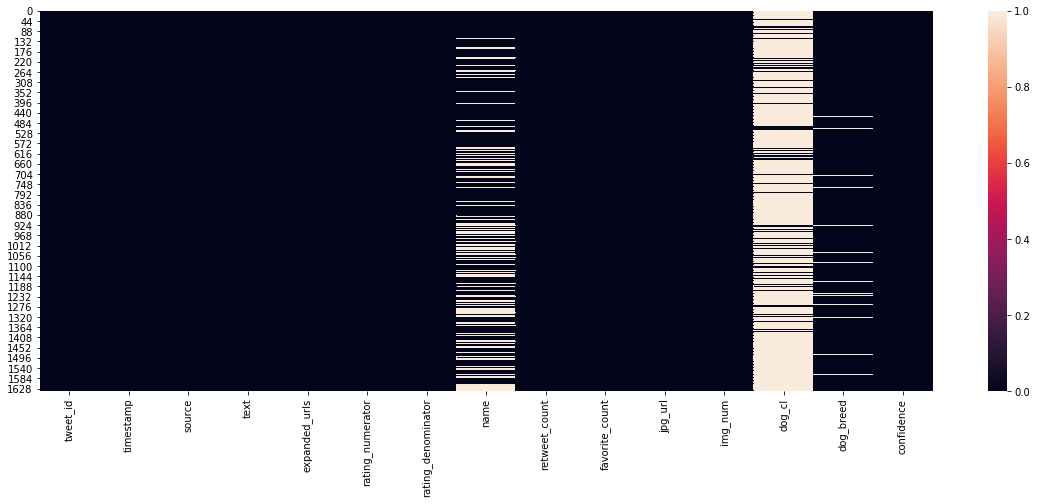

In [105]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_master_c.isnull(), vmin = 0, vmax = 1)

#### Test

In [115]:
df_master_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
tweet_id              1640 non-null object
timestamp             1640 non-null datetime64[ns]
source                1640 non-null object
text                  1640 non-null object
expanded_urls         1640 non-null object
rating_numerator      1640 non-null float64
rating_denominator    1640 non-null float64
name                  1197 non-null object
retweet_count         1640 non-null int64
favorite_count        1640 non-null int64
jpg_url               1640 non-null object
img_num               1640 non-null int64
dog_cl                250 non-null object
dog_breed             1580 non-null object
confidence            1640 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 192.3+ KB


## Saving the data in a file

In [106]:
#save the data to a *.csv file
df_master_c.to_csv('twitter_masterarchive.csv', index = False)

# Data Analysis

Questions to be considered are as follows:  
1)Out of the records where the stage of the dog is recognized which stage of the dog is most common?  
2)Out of the predicted dog breeds which is the most common breed ?   
3)Out of the records where dog breed gets predicted- which breed gets retweeted and is the most favourite?  


## 1)Out of the records where the stage of the dog is recognized which stage of the dog is most common?

To answer this question we need to look at the column dog_cl

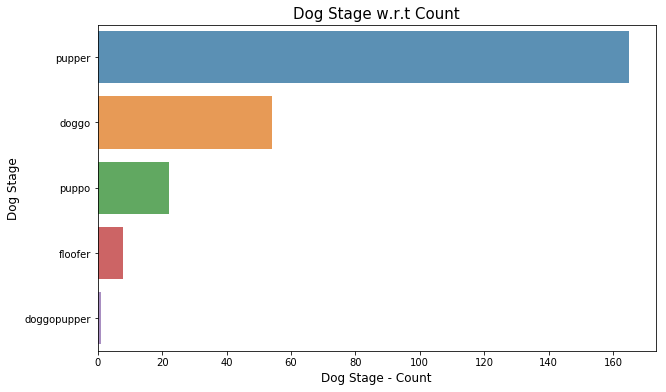

In [107]:
cnt_srs = df_master_c['dog_cl'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

### From the above chart it can be seen pupper is the most common

# 2)Out of the predicted dog breeds which is the most common breed ?   

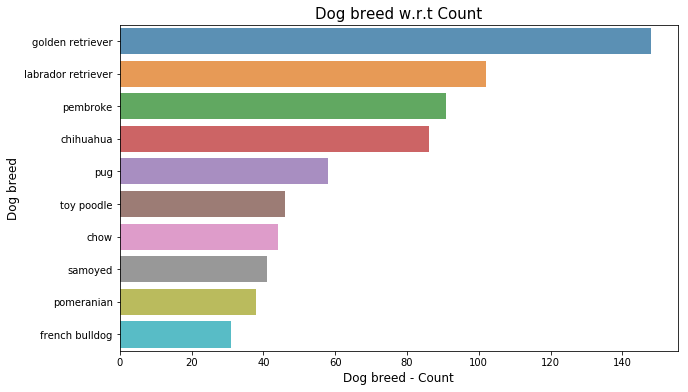

In [108]:
cnt_srs = df_master_c['dog_breed'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog breed - Count', fontsize=12)
plt.ylabel('Dog breed', fontsize=12)
plt.title("Dog breed w.r.t Count", fontsize=15)
plt.show()

### From the above it can be seen from the identified species golden retriever is the most common

# 3)Out of the records where dog breed gets predicted- which breed gets retweeted and is the most favourite?  

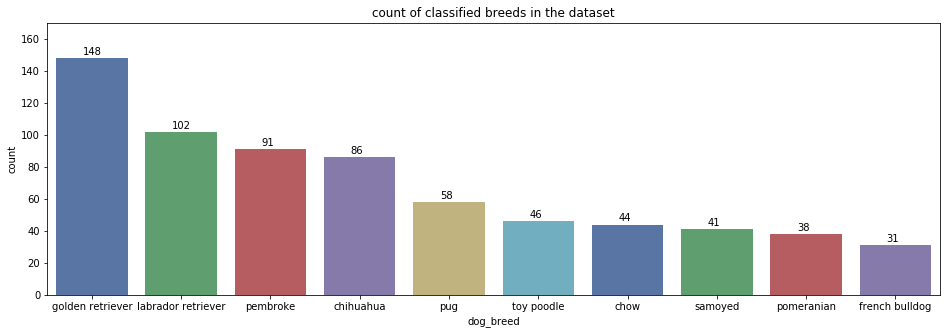

In [109]:

fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "dog_breed", data = df_master_c, order=df_master_c.dog_breed.value_counts().iloc[:10].index, palette = "deep")
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

So it can be inferred that golden retriever is the most famous

In [110]:
### Grouping the values according to the breed
df = df_master_c[["retweet_count", "favorite_count", "dog_breed"]].groupby("dog_breed", as_index = False).sum()

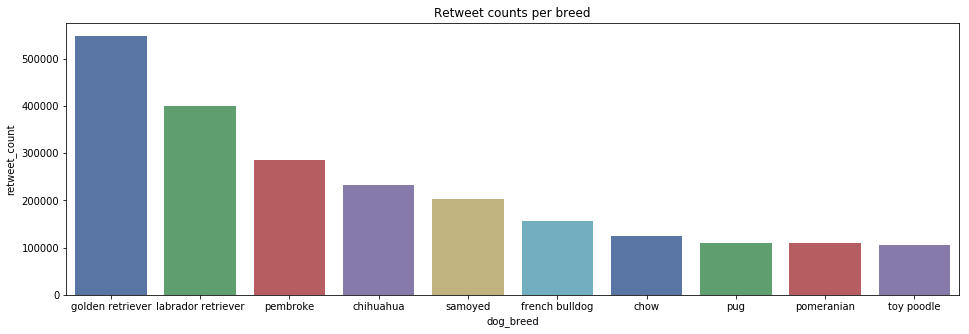

In [111]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "dog_breed", y = "retweet_count", data = df.sort_values("retweet_count", ascending=False).iloc[:10], palette = "deep")
ax.set_title("Retweet counts per breed");

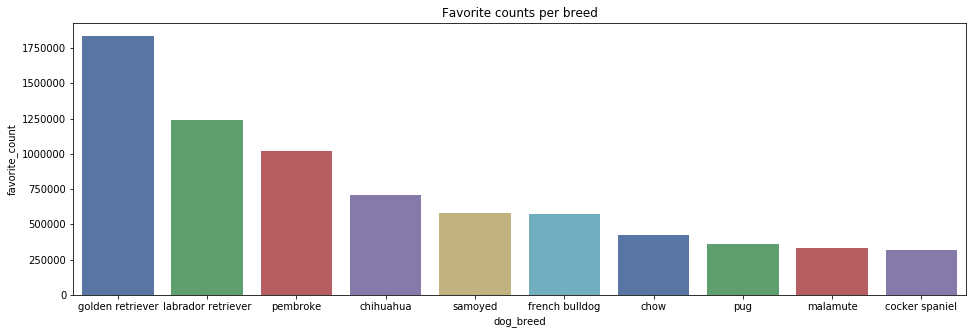

In [112]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "dog_breed", y = "favorite_count", data = df.sort_values("favorite_count", ascending=False).iloc[:10], palette = "deep")
ax.set_title("Favorite counts per breed");

### Thus in both the cases it can be seen the golden retriever and labrador are leading

# Summary

The data was fed into data frames from three different sources. Since there was a problem in getting access to tweeter developer account use of JSON file was done to feed the data.  
The phases of Gathering , Accessing and Cleaning properly followed.  
Once that was done the cleaned data frame was stored in a file twitter_masterarchive.csv  
After this the data was used to answer three relevant questions and answer them